In [42]:
%pip install pandas
%pip install matplotlib
%pip install imbalanced-learn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
wine_data = pd.read_csv('winequalityN.csv')
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [45]:
wine_data.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [46]:
rows_with_nan = wine_data.isna().any(axis=1)

# Display rows that contain at least one NaN value
nan_rows = wine_data[rows_with_nan]

nan_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


In [47]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [48]:
# Handle missing values by filling them with the mean of each column
numeric_mean = wine_data.select_dtypes(include=[float, int]).mean()

# Fill missing values in the DataFrame with the computed means
wine_data_filled = wine_data.fillna(numeric_mean)

# Display the first few rows of the updated dataframe
wine_data_filled.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [49]:
# Find rows with NaN values
rows_with_nan = wine_data_filled.isna().any(axis=1)

# Display rows that contain at least one NaN value
nan_rows = wine_data_filled[rows_with_nan]

nan_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


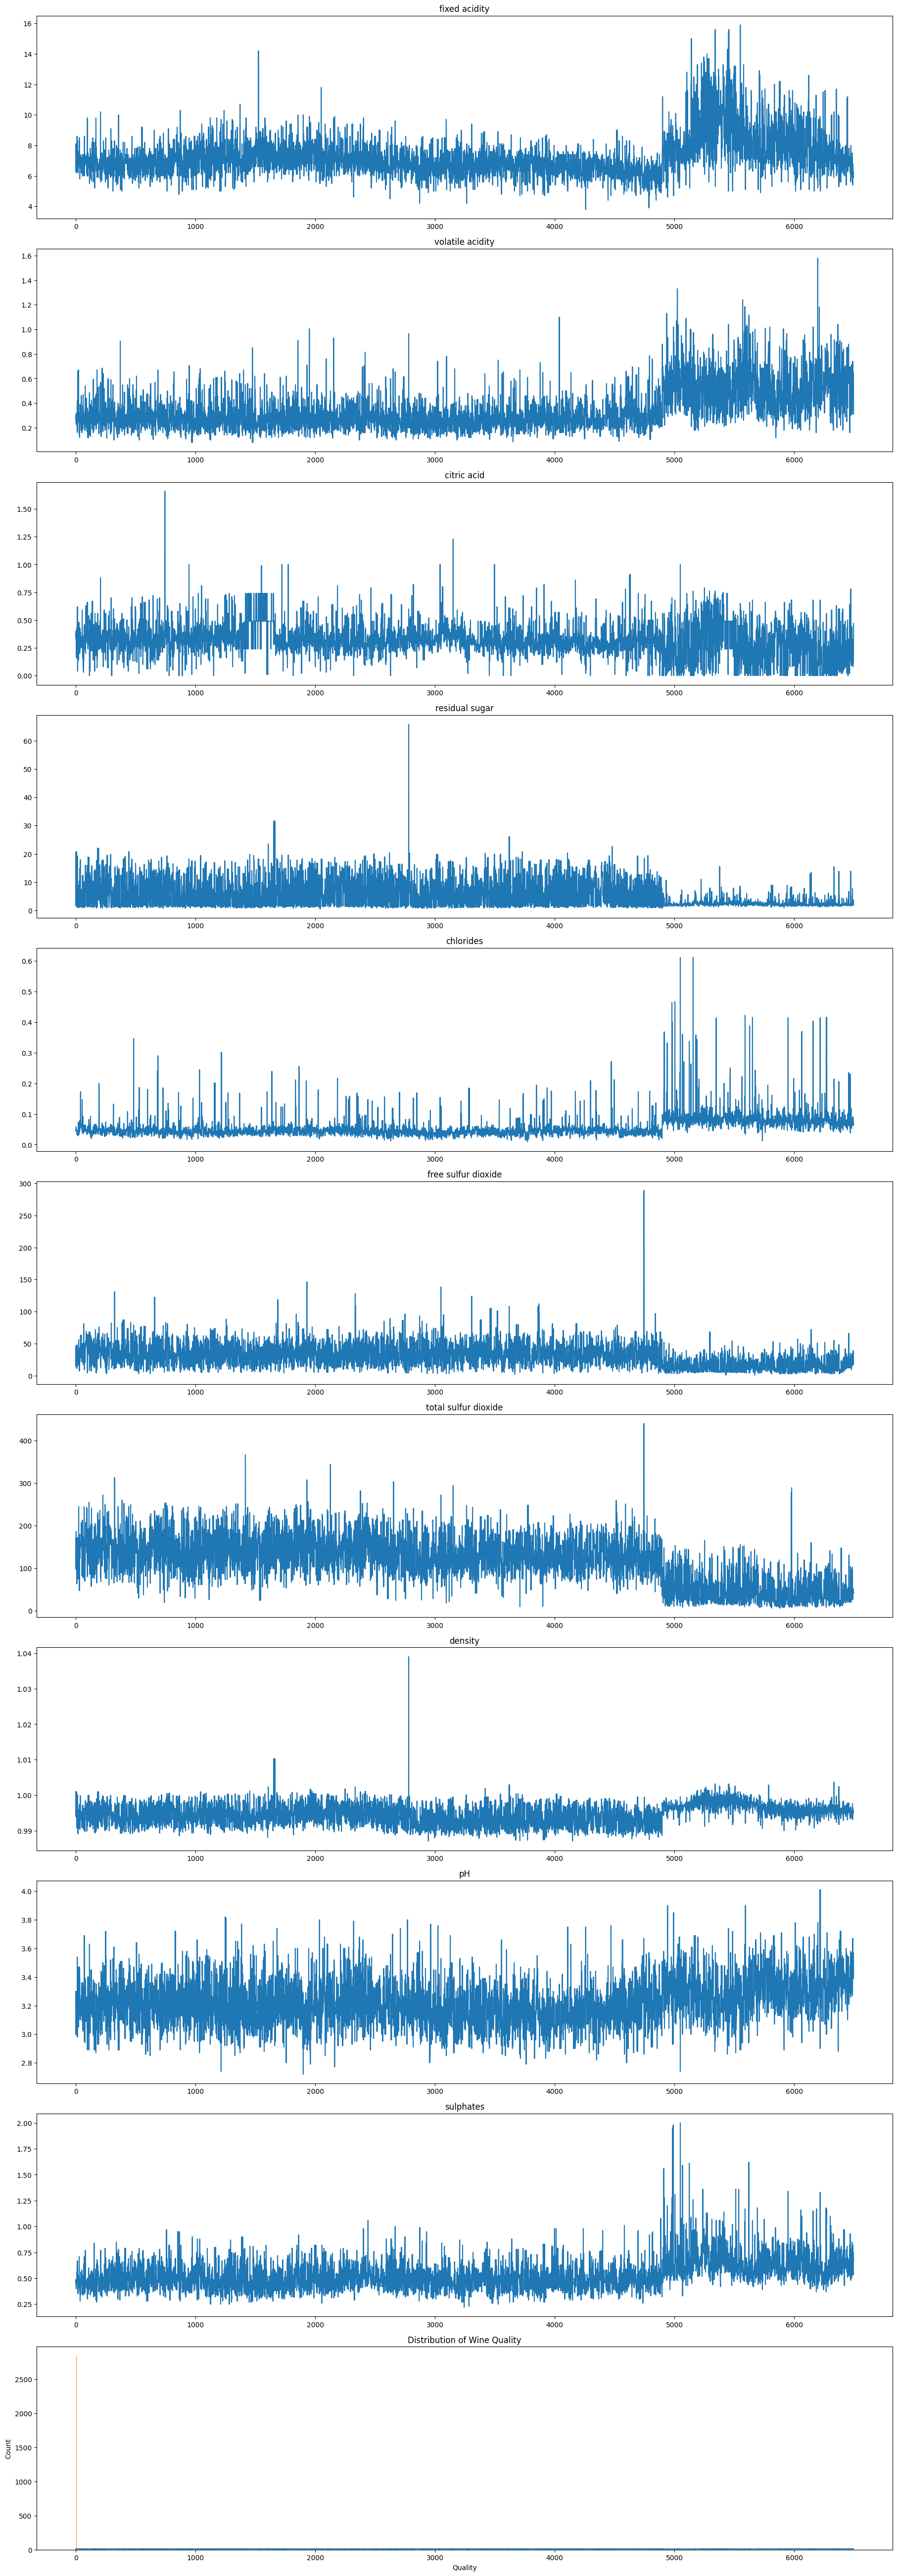

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

In [50]:
plt.rcParams["figure.figsize"] = (18, 52)
fig, axes = plt.subplots(nrows=11, ncols=1)

for index, column in enumerate(wine_data_filled.columns):
    if column == "type" or column == "quality":
        continue
    wine_data_filled[column].plot(ax=axes[index - 1], title=column)

plt.tight_layout()

plt.rcParams["figure.figsize"] = (8, 6)
plt.hist(wine_data_filled["quality"])
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

quality_distribution = wine_data_filled["quality"].value_counts().sort_index()

quality_distribution

In [51]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


label_encoder = LabelEncoder()
wine_data_filled['type'] = label_encoder.fit_transform(wine_data_filled['type'])

X = wine_data_filled.drop('quality', axis=1)
y = wine_data_filled['quality']

smote = SMOTE(sampling_strategy={9: 500}, k_neighbors=4, random_state=10)
X_resampled, y_resampled = smote.fit_resample(X, y)


resampled_quality_distribution = pd.Series(y_resampled).value_counts().sort_index()

resampled_quality_distribution

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9     500
Name: count, dtype: int64

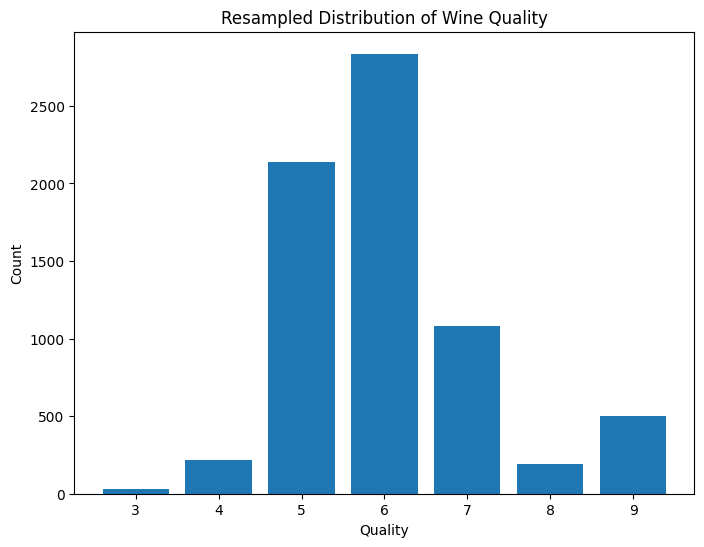

In [52]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.bar(resampled_quality_distribution.index, resampled_quality_distribution.values)
plt.title("Resampled Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=10)

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X, y, test_size=0.25, random_state=10)

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=10),
    "SVM": SVC(random_state=10),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Naive Bayes": GaussianNB()
}

def train_evaluate_classifiers(classifiers, X_train, y_train, X_test, y_test):
    accuracies = {}
    for name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}")

    return accuracies


scaler_resampled = StandardScaler()
X_train_resampled_scaled = scaler_resampled.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler_resampled.transform(X_test_resampled)

scaler_original = StandardScaler()
X_train_original_scaled = scaler_original.fit_transform(X_train_original)
X_test_original_scaled = scaler_original.transform(X_test_original)

print("Performance on Scaled Resampled Data:")
resampled_accuracies_scaled = train_evaluate_classifiers(classifiers, X_train_resampled_scaled, y_train_resampled, X_test_resampled_scaled, y_test_resampled)

print("\nPerformance on Scaled Original Data:")
original_accuracies_scaled = train_evaluate_classifiers(classifiers, X_train_original_scaled, y_train_original, X_test_original_scaled, y_test_original)

Performance on Scaled Resampled Data:
Decision Tree Accuracy: 0.6493


SVM Accuracy: 0.5921
Logistic Regression Accuracy: 0.5675
Naive Bayes Accuracy: 0.4062

Performance on Scaled Original Data:
Decision Tree Accuracy: 0.6092
SVM Accuracy: 0.5502
Logistic Regression Accuracy: 0.5218
Naive Bayes Accuracy: 0.4203


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

param_grids = {
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['saga'],
        'l1_ratio': [None, 0.2, 0.4, 0.6, 0.8]  # Use None for other penalties, specific values for 'elasticnet'
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    }
}

def hyperparameter_optimization(classifiers, param_grids, X_train, y_train):
    best_params = {}
    for name, clf in classifiers.items():
        print(f"Optimizing {name}...")

        # Custom iterator to skip incompatible combinations
        param_iter = (params for params in ParameterGrid(param_grids[name])
                      if not (params['penalty'] == 'elasticnet' and params['l1_ratio'] is None))

        # Grid search for hyperparameters
        grid_search = GridSearchCV(clf, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(X_train, y_train)

        # Store best parameters
        best_params[name] = grid_search.best_params_
        print(f"Best parameters for {name}: {grid_search.best_params_}\n")

    return best_params


optimized_parameters = hyperparameter_optimization(classifiers, param_grids, X_train_resampled_scaled, y_train_resampled)

Optimizing Decision Tree...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_s

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_mo

[CV] END C=0.001, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .....C=0.001, l1_ratio=0.4, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.001, l1_ratio=0.4, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.4, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=0.001, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....C=0.001, l1_ratio=0.4, penalty=l2, solver=saga; total time=   0.1s
[CV] END .

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_mo

[CV] END .....C=0.01, l1_ratio=None, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, l1_ratio=None, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, l1_ratio=None, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, l1_ratio=None, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, l1_ratio=None, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.2, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, l1_ratio=None, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.4, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, l1_ratio=0.4, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, l1_ratio=0.2, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, l1_ratio=None, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.1, l1_ratio=Non

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio paramet

[CV] END ......C=0.01, l1_ratio=0.6, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.4, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=0.01, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.8, penalty=l1, solver=saga; total time=   0.2s
[CV] END C=0.01, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.01, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=0.01, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.8, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.6, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.8, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.8, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, l1_ratio=0.6, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.0

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio paramet

[CV] END .......C=0.1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.4s
[CV] END ......C=0.1, l1_ratio=None, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l2, solver=saga; total time=   0.4s
[CV] END .......C=0.1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......C=0.1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   0.4s
[CV] END ......C=0.1, l1_ratio=None, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......C=0.1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......C=0.1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.6s
[CV] END ......C=0.1, l1_ratio=None, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   0.6s
[CV] END ......C=0.1, l1_ratio=None, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ra

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/pytho

[CV] END .......C=0.1, l1_ratio=0.4, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.8, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.8, penalty=l2, solver=saga; total time=   0.6s
[CV] END .......C=0.1, l1_ratio=0.8, penalty=l2, solver=saga; total time=   0.6s
[CV] END C=0.1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.7s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.8s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.8s
[CV] END C=0.1, l1_ratio=

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='no

[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   0.9s
[CV] END C=0.1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.9s
[CV] END C=0.1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   0.9s
[CV] END C=0.1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   1.0s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio paramet

[CV] END C=0.1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   1.0s
[CV] END C=0.1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   1.1s
[CV] END C=0.1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   1.1s
[CV] END C=0.1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   1.1s
[CV] END C=0.1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   1.1s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=0.1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   1.3s
[CV] END C=0.1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   1.5s
[CV] END C=0.1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   1.6s
[CV] END C=0.1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   1.6s
[CV] END C=0.1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   1.6s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=0.1, l1_ratio=None, penalty=l1, solver=saga; total time=   2.1s
[CV] END .......C=0.1, l1_ratio=0.2, penalty=l1, solver=saga; total time=   2.1s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   2.1s
[CV] END .......C=0.1, l1_ratio=0.6, penalty=l1, solver=saga; total time=   2.1s
[CV] END .......C=0.1, l1_ratio=0.8, penalty=l1, solver=saga; total time=   2.1s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/pytho

[CV] END ........C=1, l1_ratio=None, penalty=l2, solver=saga; total time=   2.1s
[CV] END .........C=1, l1_ratio=0.4, penalty=l2, solver=saga; total time=   2.1s
[CV] END .........C=1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   2.2s
[CV] END ........C=1, l1_ratio=None, penalty=l2, solver=saga; total time=   2.5s
[CV] END .........C=1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   2.1s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   2.7s
[CV] END .......C=0.1, l1_ratio=0.2, penalty=l1, solver=saga; total time=   2.8s
[CV] END .........C=1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   2.6s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   2.7s
[CV] END ......C=0.1, l1_ratio=None, penalty=l1, solver=saga; total time=   2.8s
[CV] END C=10, l1_ratio=None, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=None, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=No

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_mo

[CV] END ......C=0.1, l1_ratio=None, penalty=l1, solver=saga; total time=   2.9s
[CV] END .........C=1, l1_ratio=0.4, penalty=l2, solver=saga; total time=   2.6s
[CV] END ........C=1, l1_ratio=None, penalty=l2, solver=saga; total time=   2.7s
[CV] END .........C=1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   2.3s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   2.9s
[CV] END .......C=0.1, l1_ratio=0.2, penalty=l1, solver=saga; total time=   2.9s
[CV] END .......C=0.1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   2.9s
[CV] END .......C=0.1, l1_ratio=0.6, penalty=l1, solver=saga; total time=   2.9s
[CV] END .......C=0.1, l1_ratio=0.8, penalty=l1, solver=saga; total time=   2.8s
[CV] END .........C=1, l1_ratio=0.4, penalty=l2, solver=saga; total time=   2.7s
[CV] END .C=1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   2.8s
[CV] END ........C=1, l1_ratio=None, penalty=l2, solver=saga; total time=   2.9s
[CV] END .......C=0.1, l1_ra

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183:

[CV] END .........C=1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   2.6s
[CV] END .C=1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   3.1s
[CV] END ........C=1, l1_ratio=None, penalty=l2, solver=saga; total time=   3.3s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   3.3s
[CV] END .........C=1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   2.8s
[CV] END .C=1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   3.4s
[CV] END .........C=1, l1_ratio=0.8, penalty=l2, solver=saga; total time=   2.5s
[CV] END .........C=1, l1_ratio=0.2, penalty=l2, solver=saga; total time=   3.4s
[CV] END .........C=1, l1_ratio=0.4, penalty=l2, solver=saga; total time=   3.4s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio paramet

[CV] END .........C=1, l1_ratio=0.6, penalty=l2, solver=saga; total time=   3.2s
[CV] END .........C=1, l1_ratio=0.8, penalty=l2, solver=saga; total time=   2.8s
[CV] END .........C=1, l1_ratio=0.8, penalty=l2, solver=saga; total time=   3.1s
[CV] END .C=1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   4.0s
[CV] END .........C=1, l1_ratio=0.8, penalty=l2, solver=saga; total time=   3.1s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   3.6s
[CV] END .C=1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   4.1s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183:

[CV] END ...C=0.001, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.8s
[CV] END ...C=0.001, l1_ratio=0.2, penalty=none, solver=saga; total time=   4.9s
[CV] END ..C=0.001, l1_ratio=None, penalty=none, solver=saga; total time=   5.0s
[CV] END ..C=0.001, l1_ratio=None, penalty=none, solver=saga; total time=   5.0s
[CV] END ...C=0.001, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.0s
[CV] END ...C=0.001, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.9s
[CV] END .C=1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   4.3s
[CV] END ...C=0.001, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.0s
[CV] END ..C=0.001, l1_ratio=None, penalty=none, solver=saga; total time=   5.0s
[CV] END ...C=0.01, l1_ratio=None, penalty=none, solver=saga; total time=   4.9s
[CV] END ...C=0.001, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.1s
[CV] END ....C=0.01, l1_ratio=0.2, penalty=none, solver=saga; total time=   4.9s
[CV] END ...C=0.001, l1_rati

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penal

[CV] END ...C=0.001, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.0s
[CV] END .C=1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   4.3s
[CV] END .C=1, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   4.5s
[CV] END ...C=0.001, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.1s
[CV] END ....C=0.01, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.9s
[CV] END ...C=0.001, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.1s
[CV] END .....C=0.1, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.7s
[CV] END ...C=0.01, l1_ratio=None, penalty=none, solver=saga; total time=   5.0s
[CV] END ....C=0.01, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.0s
[CV] END .....C=0.1, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.8s
[CV] END ..C=0.001, l1_ratio=None, penalty=none, solver=saga; total time=   5.3s
[CV] END ..C=0.001, l1_ratio=None, penalty=none, solver=saga; total time=   5.3s
[CV] END ...C=0.001, l1_rati

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty

[CV] END ....C=0.01, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.1s
[CV] END ...C=0.001, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.2s
[CV] END ...C=0.001, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.3s
[CV] END ....C=0.01, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.1s
[CV] END ...C=0.001, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.4s
[CV] END ...C=0.001, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.4s
[CV] END ....C=0.01, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.2s
[CV] END ...C=0.01, l1_ratio=None, penalty=none, solver=saga; total time=   5.3s
[CV] END ....C=0.1, l1_ratio=None, penalty=none, solver=saga; total time=   5.1s
[CV] END ...C=0.01, l1_ratio=None, penalty=none, solver=saga; total time=   5.3s
[CV] END ...C=0.001, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.4s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.1s
[CV] END ....C=0.01, l1_rati

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END ...C=0.001, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.4s
[CV] END ......C=1, l1_ratio=None, penalty=none, solver=saga; total time=   5.0s
[CV] END .....C=0.1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.1s
[CV] END .....C=0.1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.1s
[CV] END ...C=0.001, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.4s
[CV] END ...C=0.001, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.5s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.2s
[CV] END ....C=0.01, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.3s
[CV] END ....C=0.01, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.4s
[CV] END C=100, l1_ratio=None, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   4.5s
[CV] END C=100, l1_ratio=None, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, l1_ratio

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the co

[CV] END .......C=1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.2s
[CV] END ......C=1, l1_ratio=None, penalty=none, solver=saga; total time=   5.2s
[CV] END ....C=0.1, l1_ratio=None, penalty=none, solver=saga; total time=   5.4s
[CV] END ....C=0.01, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.5s
[CV] END .....C=0.1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.3s
[CV] END ....C=0.1, l1_ratio=None, penalty=none, solver=saga; total time=   5.5s
[CV] END .....C=0.1, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.4s
[CV] END ....C=0.01, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.6s
[CV] END .....C=0.1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.4s[CV] END .....C=0.1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.4s

[CV] END .....C=0.1, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.5s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   4.8s
[CV] END .....C=0.1, l1_rati

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: 


[CV] END ....C=0.01, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.6s
[CV] END ....C=0.1, l1_ratio=None, penalty=none, solver=saga; total time=   5.6s
[CV] END ....C=0.1, l1_ratio=None, penalty=none, solver=saga; total time=   5.6s
[CV] END .....C=0.1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.5s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.6s
[CV] END ......C=1, l1_ratio=None, penalty=none, solver=saga; total time=   5.4s
[CV] END .C=1, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   5.2s
[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.6s
[CV] END .....C=0.1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.6s
[CV] END ......C=1, l1_ratio=None, penalty=none, solver=saga; total time=   5.5s[CV] END .....C=0.1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.6s

[CV] END .....C=0.1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.7s
[CV] END .......C=1, l1_rat

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be

[CV] END .....C=0.1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.7s
[CV] END .......C=1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.0s
[CV] END .......C=1, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.3s
[CV] END ........C=1, l1_ratio=None, penalty=l1, solver=saga; total time=   5.7s
[CV] END .......C=1, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.4s
[CV] END .......C=1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.6s
[CV] END .......C=1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.7s
[CV] END .........C=1, l1_ratio=0.2, penalty=l1, solver=saga; total time=   5.7s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty

[CV] END .......C=1, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.8s
[CV] END .......C=1, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.5s
[CV] END .........C=1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   5.9s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   5.4s
[CV] END .........C=1, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.0s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

[CV] END .......C=1, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.6s
[CV] END .........C=1, l1_ratio=0.6, penalty=l1, solver=saga; total time=   5.7s
[CV] END .......C=1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.5s
[CV] END .......C=1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.6s
[CV] END ........C=1, l1_ratio=None, penalty=l1, solver=saga; total time=   6.2s
[CV] END .......C=1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.6s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not co

[CV] END .......C=1, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.6s
[CV] END .C=1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.2s
[CV] END ........C=1, l1_ratio=None, penalty=l1, solver=saga; total time=   6.3s
[CV] END .........C=1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   6.3s
[CV] END .........C=1, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.4s
[CV] END .........C=1, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.4s
[CV] END .........C=1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   6.3s
[CV] END .........C=1, l1_ratio=0.8, penalty=l1, solver=saga; total time=   5.8s
[CV] END .........C=1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   6.4s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T

[CV] END ........C=1, l1_ratio=None, penalty=l1, solver=saga; total time=   6.5s
[CV] END .........C=1, l1_ratio=0.4, penalty=l1, solver=saga; total time=   6.4s
[CV] END .........C=1, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.5s
[CV] END ........C=1, l1_ratio=None, penalty=l1, solver=saga; total time=   6.6s
[CV] END .......C=1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.1s
[CV] END .........C=1, l1_ratio=0.6, penalty=l1, solver=saga; total time=   6.2s
[CV] END .......C=1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.1s
[CV] END .........C=1, l1_ratio=0.6, penalty=l1, solver=saga; total time=   6.3s
[CV] END .........C=1, l1_ratio=0.6, penalty=l1, solver=saga; total time=   6.3s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the co

[CV] END .........C=1, l1_ratio=0.6, penalty=l1, solver=saga; total time=   6.4s
[CV] END .........C=1, l1_ratio=0.8, penalty=l1, solver=saga; total time=   6.2s
[CV] END .........C=1, l1_ratio=0.8, penalty=l1, solver=saga; total time=   6.3s
[CV] END .C=1, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   6.4s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penal

[CV] END .........C=1, l1_ratio=0.8, penalty=l1, solver=saga; total time=   6.3s
[CV] END .........C=1, l1_ratio=0.8, penalty=l1, solver=saga; total time=   6.3s
[CV] END .......C=1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.2s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T

[CV] END .......C=1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.4s
[CV] END .......C=1, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.5s
[CV] END .C=1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   6.0s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1

[CV] END .......C=10, l1_ratio=None, penalty=l2, solver=saga; total time=   5.1s
[CV] END .....C=10, l1_ratio=None, penalty=none, solver=saga; total time=   5.0s
[CV] END .C=1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   6.6s
[CV] END .......C=10, l1_ratio=None, penalty=l2, solver=saga; total time=   5.4s
[CV] END ........C=10, l1_ratio=0.2, penalty=l2, solver=saga; total time=   5.1s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END .......C=10, l1_ratio=None, penalty=l2, solver=saga; total time=   5.3s
[CV] END .....C=10, l1_ratio=None, penalty=none, solver=saga; total time=   5.3s
[CV] END ........C=10, l1_ratio=0.2, penalty=l2, solver=saga; total time=   5.2s
[CV] END .....C=10, l1_ratio=None, penalty=none, solver=saga; total time=   5.3s
[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.1s
[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.1s
[CV] END .C=1, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   6.6s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END .......C=10, l1_ratio=None, penalty=l2, solver=saga; total time=   5.5s
[CV] END .......C=10, l1_ratio=None, penalty=l2, solver=saga; total time=   5.6s
[CV] END .....C=10, l1_ratio=None, penalty=none, solver=saga; total time=   5.6s
[CV] END .....C=10, l1_ratio=None, penalty=none, solver=saga; total time=   5.6s
[CV] END ........C=10, l1_ratio=0.2, penalty=l2, solver=saga; total time=   5.5s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END ........C=10, l1_ratio=0.2, penalty=l2, solver=saga; total time=   5.5s
[CV] END ........C=10, l1_ratio=0.2, penalty=l2, solver=saga; total time=   5.6s
[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.4s
[CV] END ........C=10, l1_ratio=0.4, penalty=l2, solver=saga; total time=   5.0s
[CV] END .......C=10, l1_ratio=None, penalty=l1, solver=saga; total time=   6.3s
[CV] END .......C=10, l1_ratio=None, penalty=l1, solver=saga; total time=   6.4s
[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.6s
[CV] END .......C=10, l1_ratio=None, penalty=l1, solver=saga; total time=   6.4s
[CV] END ........C=10, l1_ratio=0.4, penalty=l2, solver=saga; total time=   5.1s
[CV] END .......C=10, l1_ratio=None, penalty=l1, solver=saga; total time=   6.3s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.6s
[CV] END .......C=10, l1_ratio=None, penalty=l1, solver=saga; total time=   6.5s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END ........C=10, l1_ratio=0.4, penalty=l2, solver=saga; total time=   5.5s
[CV] END ........C=10, l1_ratio=0.4, penalty=l2, solver=saga; total time=   5.4s
[CV] END ........C=10, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.1s
[CV] END ........C=10, l1_ratio=0.4, penalty=l1, solver=saga; total time=   5.7s
[CV] END ........C=10, l1_ratio=0.4, penalty=l1, solver=saga; total time=   6.0s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END ........C=10, l1_ratio=0.4, penalty=l2, solver=saga; total time=   5.6s
[CV] END ........C=10, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.3s
[CV] END ......C=10, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.9s
[CV] END ........C=10, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.4s
[CV] END ........C=10, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.4s
[CV] END ......C=10, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.8s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   6.3s
[CV] END ......C=10, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.0s
[CV] END ........C=10, l1_ratio=0.2, penalty=l1, solver=saga; total time=   6.5s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END ........C=10, l1_ratio=0.4, penalty=l1, solver=saga; total time=   6.2s
[CV] END ........C=10, l1_ratio=0.6, penalty=l2, solver=saga; total time=   4.8s
[CV] END ......C=10, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.9s
[CV] END ......C=100, l1_ratio=None, penalty=l2, solver=saga; total time=   4.2s
[CV] END ......C=10, l1_ratio=0.4, penalty=none, solver=saga; total time=   5.1s
[CV] END ........C=10, l1_ratio=0.6, penalty=l2, solver=saga; total time=   4.9s
[CV] END ........C=10, l1_ratio=0.8, penalty=l2, solver=saga; total time=   4.6s
[CV] END ........C=10, l1_ratio=0.4, penalty=l1, solver=saga; total time=   6.3s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END ......C=10, l1_ratio=0.6, penalty=none, solver=saga; total time=   4.9s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   6.7s
[CV] END ......C=10, l1_ratio=0.8, penalty=none, solver=saga; total time=   4.6s
[CV] END ........C=10, l1_ratio=0.4, penalty=l1, solver=saga; total time=   6.4s
[CV] END ........C=10, l1_ratio=0.8, penalty=l2, solver=saga; total time=   4.8s
[CV] END ........C=10, l1_ratio=0.6, penalty=l2, solver=saga; total time=   5.1s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   6.7s
[CV] END ......C=10, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.0s
[CV] END .....C=100, l1_ratio=0.2, penalty=none, solver=saga; total time=   4.3s
[CV] END ........C=10, l1_ratio=0.8, penalty=l2, solver=saga; total time=   4.9s
[CV] END .......C=100, l1_ratio=0.4, penalty=l2, solver=saga; total time=   4.2s
[CV] END ....C=100, l1_ratio=None, penalty=none, solver=saga; total time=   4.6s
[CV] END ........C=10, l1_ra

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END ......C=100, l1_ratio=None, penalty=l2, solver=saga; total time=   4.7s
[CV] END ........C=10, l1_ratio=0.8, penalty=l2, solver=saga; total time=   4.9s
[CV] END ......C=10, l1_ratio=0.8, penalty=none, solver=saga; total time=   4.8s
[CV] END ......C=10, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.2s
[CV] END ........C=10, l1_ratio=0.6, penalty=l2, solver=saga; total time=   5.3s
[CV] END .......C=100, l1_ratio=0.2, penalty=l2, solver=saga; total time=   4.5s
[CV] END ......C=10, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.2s
[CV] END C=10, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   5.3s
[CV] END ......C=10, l1_ratio=0.8, penalty=none, solver=saga; total time=   4.9s
[CV] END ......C=100, l1_ratio=None, penalty=l2, solver=saga; total time=   4.8s
[CV] END ....C=100, l1_ratio=None, penalty=none, solver=saga; total time=   4.8s
[CV] END .....C=100, l1_ratio=0.2, penalty=none, solver=saga; total time=   4.5s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END C=10, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   6.4s
[CV] END ......C=10, l1_ratio=0.6, penalty=none, solver=saga; total time=   5.3s
[CV] END ......C=10, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.0s
[CV] END .......C=100, l1_ratio=0.2, penalty=l2, solver=saga; total time=   4.6s
[CV] END ........C=10, l1_ratio=0.8, penalty=l2, solver=saga; total time=   5.2s
[CV] END C=10, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   5.9s
[CV] END .....C=100, l1_ratio=0.2, penalty=none, solver=saga; total time=   4.6s
[CV] END ......C=10, l1_ratio=0.8, penalty=none, solver=saga; total time=   5.0s
[CV] END C=10, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   7.1s
[CV] END C=10, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   6.2s
[CV] END ....C=100, l1_ratio=None, penalty=none, solver=saga; total time=   4.9s
[CV] END .....C=100, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.3s
[CV] END ........C=10, l1_ra

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END .....C=100, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.4s
[CV] END .....C=100, l1_ratio=0.2, penalty=none, solver=saga; total time=   4.7s
[CV] END .....C=100, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.5s
[CV] END .......C=100, l1_ratio=0.4, penalty=l2, solver=saga; total time=   4.6s
[CV] END .....C=100, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.5s
[CV] END .......C=100, l1_ratio=0.4, penalty=l2, solver=saga; total time=   4.7s
[CV] END ......C=100, l1_ratio=None, penalty=l2, solver=saga; total time=   5.2s
[CV] END ........C=10, l1_ratio=0.6, penalty=l1, solver=saga; total time=   5.8s
[CV] END .......C=100, l1_ratio=0.2, penalty=l2, solver=saga; total time=   5.0s
[CV] END ........C=10, l1_ratio=0.8, penalty=l1, solver=saga; total time=   5.6s
[CV] END .......C=100, l1_ratio=0.6, penalty=l2, solver=saga; total time=   4.2s
[CV] END C=10, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   6.3s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END .......C=100, l1_ratio=0.4, penalty=l2, solver=saga; total time=   4.8s
[CV] END C=10, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.4s
[CV] END C=10, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.5s
[CV] END ......C=100, l1_ratio=None, penalty=l1, solver=saga; total time=   5.4s
[CV] END ......C=100, l1_ratio=None, penalty=l1, solver=saga; total time=   5.4s
[CV] END .....C=100, l1_ratio=0.4, penalty=none, solver=saga; total time=   4.7s
[CV] END ........C=10, l1_ratio=0.6, penalty=l1, solver=saga; total time=   6.0s
[CV] END .......C=100, l1_ratio=0.2, penalty=l2, solver=saga; total time=   5.1s
[CV] END .......C=100, l1_ratio=0.2, penalty=l1, solver=saga; total time=   5.3s
[CV] END .....C=100, l1_ratio=0.2, penalty=none, solver=saga; total time=   5.1s
[CV] END ........C=10, l1_ratio=0.8, penalty=l1, solver=saga; total time=   5.8s
[CV] END ........C=10, l1_ratio=0.6, penalty=l1, solver=saga; total time=   6.1s
[CV] END ........C=10, l1_ra

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END .......C=100, l1_ratio=0.6, penalty=l2, solver=saga; total time=   4.5s
[CV] END ........C=10, l1_ratio=0.8, penalty=l1, solver=saga; total time=   5.9s
[CV] END C=10, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   6.0s[CV] END .......C=100, l1_ratio=0.6, penalty=l1, solver=saga; total time=   4.7s

[CV] END ........C=10, l1_ratio=0.8, penalty=l1, solver=saga; total time=   5.9s
[CV] END .......C=100, l1_ratio=0.6, penalty=l2, solver=saga; total time=   4.6s
[CV] END C=10, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   6.0s
[CV] END C=10, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.7s
[CV] END .......C=100, l1_ratio=0.8, penalty=l2, solver=saga; total time=   3.9s
[CV] END C=10, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.8s
[CV] END .......C=100, l1_ratio=0.4, penalty=l1, solver=saga; total time=   5.2s
[CV] END C=10, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   6.2s
[CV] END .......C=100, l1_ra

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END C=100, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   5.1s
[CV] END .....C=100, l1_ratio=0.6, penalty=none, solver=saga; total time=   4.3s
[CV] END ......C=100, l1_ratio=None, penalty=l1, solver=saga; total time=   5.8s
[CV] END .....C=100, l1_ratio=0.6, penalty=none, solver=saga; total time=   4.4s
[CV] END C=10, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.9s
[CV] END .......C=100, l1_ratio=0.2, penalty=l1, solver=saga; total time=   5.6s
[CV] END C=100, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   5.5s
[CV] END .......C=100, l1_ratio=0.2, penalty=l1, solver=saga; total time=   5.6s
[CV] END .......C=100, l1_ratio=0.8, penalty=l2, solver=saga; total time=   4.2s
[CV] END .....C=100, l1_ratio=0.6, penalty=none, solver=saga; total time=   4.4s
[CV] END ......C=100, l1_ratio=None, penalty=l1, solver=saga; total time=   5.9s
[CV] END C=100, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   5.3s
[CV] END C=100, l1_ratio=

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END .......C=100, l1_ratio=0.6, penalty=l1, solver=saga; total time=   5.2s
[CV] END .......C=100, l1_ratio=0.4, penalty=l1, solver=saga; total time=   5.6s
[CV] END C=100, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   5.7s
[CV] END .......C=100, l1_ratio=0.8, penalty=l2, solver=saga; total time=   4.3s
[CV] END .....C=100, l1_ratio=0.6, penalty=none, solver=saga; total time=   4.6s
[CV] END .......C=100, l1_ratio=0.4, penalty=l1, solver=saga; total time=   5.6s
[CV] END .....C=100, l1_ratio=0.8, penalty=none, solver=saga; total time=   3.8s
[CV] END .....C=100, l1_ratio=0.8, penalty=none, solver=saga; total time=   3.9s
[CV] END C=100, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   5.8s
[CV] END .....C=100, l1_ratio=0.8, penalty=none, solver=saga; total time=   4.1s
[CV] END C=100, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   4.9s
[CV] END .....C=100, l1_ratio=0.8, penalty=none, solver=saga; total time=   3.7s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END C=100, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   5.0s
[CV] END C=100, l1_ratio=0.2, penalty=elasticnet, solver=saga; total time=   5.9s
[CV] END .......C=100, l1_ratio=0.4, penalty=l1, solver=saga; total time=   5.8s
[CV] END C=100, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   5.0s
[CV] END .......C=100, l1_ratio=0.8, penalty=l1, solver=saga; total time=   4.7s
[CV] END .......C=100, l1_ratio=0.8, penalty=l2, solver=saga; total time=   4.6s
[CV] END .......C=100, l1_ratio=0.4, penalty=l1, solver=saga; total time=   5.9s
[CV] END .......C=100, l1_ratio=0.6, penalty=l1, solver=saga; total time=   5.4s
[CV] END .......C=100, l1_ratio=0.6, penalty=l1, solver=saga; total time=   5.4s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

[CV] END C=100, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   5.1s
[CV] END .....C=100, l1_ratio=0.8, penalty=none, solver=saga; total time=   4.0s
[CV] END C=100, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   4.4s
[CV] END C=100, l1_ratio=0.4, penalty=elasticnet, solver=saga; total time=   5.9s
[CV] END .......C=100, l1_ratio=0.6, penalty=l1, solver=saga; total time=   5.6s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.6, penalty=elasticnet, solver=saga; total time=   5.3s
[CV] END .......C=100, l1_ratio=0.8, penalty=l1, solver=saga; total time=   5.0s
[CV] END .......C=100, l1_ratio=0.8, penalty=l1, solver=saga; total time=   5.2s
[CV] END .......C=100, l1_ratio=0.8, penalty=l1, solver=saga; total time=   5.2s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.0s
[CV] END C=100, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.0s
[CV] END C=100, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.0s


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.

[CV] END C=100, l1_ratio=0.8, penalty=elasticnet, solver=saga; total time=   5.1s
Best parameters for Logistic Regression: {'C': 100, 'l1_ratio': None, 'penalty': 'l2', 'solver': 'saga'}

Optimizing Naive Bayes...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [55]:
optimized_parameters

{'Decision Tree': {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 'SVM': {'C': 10, 'kernel': 'rbf'},
 'Logistic Regression': {'C': 100,
  'l1_ratio': None,
  'penalty': 'l2',
  'solver': 'saga'},
 'Naive Bayes': {'var_smoothing': 1e-06}}

In [56]:
def plot_decision_boundaries(X, y, model, title):
    # Define the grid range
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    roc_auc_score,
)
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert the 'type' column to numerical values using Label Encoding
label_encoder = LabelEncoder()
wine_data_filled["type"] = label_encoder.fit_transform(wine_data_filled["type"])

# Split the dataset into features and target
X = wine_data_filled.drop("quality", axis=1)
y = wine_data_filled["quality"]

# Model initializations
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB(),
}

# Levels of imbalance to be tested
imbalance_levels = [500, 750, 1000, 1250, 1500, 1750, 2000]

accuracy_results = {}
f1_results = {}

for level in imbalance_levels:
    print(f"\n\nTesting for imbalance level: {level} synthetic samples\n{'-'*50}")

    current_accuracies = {}
    current_f1_scores = {}

    # Apply SMOTE to generate synthetic samples for the minority class (quality = 9 and 3)
    smote = SMOTE(
        sampling_strategy={3: level, 4: level, 8: level, 9: level},
        k_neighbors=4,
        random_state=10,
    )
    X_resampled_scaled, y_resampled_scaled = smote.fit_resample(X, y)

    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled_scaled, y_resampled_scaled, test_size=0.3, random_state=10
    )

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        current_accuracies[name] = accuracy
        f1 = f1_score(y_test, predictions, average="weighted")
        current_f1_scores[name] = f1
        print(f"F1-score for {name}: {f1:.4f}")
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(
            f"Classification Report for {name}:\n",
            classification_report(y_test, predictions),
        )
        print("-" * 50)

        if name == "SVM":
            prob_predictions = clf.predict_proba(X_test)  # Get predicted probabilities
            roc_auc = roc_auc_score(
                y_test, prob_predictions, multi_class="ovr"
            )  # Calculate ROC AUC
            print(f"SVM on Dataset with Imbalance Level {level}")
            print(classification_report(y_test, predictions))
            print("ROC AUC Score:", roc_auc)
            print("-" * 50)

    for name, accuracy in current_accuracies.items():
        if name not in accuracy_results:
            accuracy_results[name] = []
        accuracy_results[name].append(accuracy)

    for name, f1 in current_f1_scores.items():
        if name not in f1_results:
            f1_results[name] = []
        f1_results[name].append(f1)



Testing for imbalance level: 500 synthetic samples
--------------------------------------------------


F1-score for Decision Tree: 0.5974
Accuracy for Decision Tree: 0.5981
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           3       0.67      0.73      0.70       138
           4       0.44      0.44      0.44       155
           5       0.60      0.61      0.60       629
           6       0.60      0.59      0.60       866
           7       0.49      0.48      0.49       322
           8       0.52      0.49      0.50       156
           9       0.98      0.98      0.98       150

    accuracy                           0.60      2416
   macro avg       0.61      0.62      0.62      2416
weighted avg       0.60      0.60      0.60      2416

--------------------------------------------------
F1-score for SVM: 0.2128
Accuracy for SVM: 0.3663
Classification Report for SVM:
               precision    recall  f1-score   support

           3       1.00      0.12      0.22       138
           4       0.00      0.00      0.00      

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

SVM on Dataset with Imbalance Level 500
              precision    recall  f1-score   support

           3       1.00      0.12      0.22       138
           4       0.00      0.00      0.00       155
           5       0.47      0.02      0.04       629
           6       0.36      0.99      0.53       866
           7       0.00      0.00      0.00       322
           8       0.00      0.00      0.00       156
           9       0.00      0.00      0.00       150

    accuracy                           0.37      2416
   macro avg       0.26      0.16      0.11      2416
weighted avg       0.31      0.37      0.21      2416

ROC AUC Score: 0.7501730766995135
--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-score for Logistic Regression: 0.4378
Accuracy for Logistic Regression: 0.4880
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.57      0.19      0.28       138
           4       0.67      0.04      0.07       155
           5       0.50      0.60      0.55       629
           6       0.47      0.70      0.56       866
           7       0.43      0.16      0.24       322
           8       0.29      0.01      0.02       156
           9       0.59      0.72      0.65       150

    accuracy                           0.49      2416
   macro avg       0.50      0.35      0.34      2416
weighted avg       0.49      0.49      0.44      2416

--------------------------------------------------
F1-score for Naive Bayes: 0.3645
Accuracy for Naive Bayes: 0.3800
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.34      0.43      0.38       138
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

SVM on Dataset with Imbalance Level 750
              precision    recall  f1-score   support

           3       0.88      0.09      0.17       222
           4       0.00      0.00      0.00       192
           5       0.45      0.05      0.09       630
           6       0.32      0.97      0.49       876
           7       0.00      0.00      0.00       330
           8       0.00      0.00      0.00       249
           9       0.00      0.00      0.00       217

    accuracy                           0.33      2716
   macro avg       0.24      0.16      0.11      2716
weighted avg       0.28      0.33      0.19      2716

ROC AUC Score: 0.7563139615330592
--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-score for Logistic Regression: 0.4339
Accuracy for Logistic Regression: 0.4786
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.57      0.23      0.33       222
           4       0.75      0.17      0.28       192
           5       0.47      0.56      0.51       630
           6       0.45      0.67      0.53       876
           7       0.33      0.09      0.14       330
           8       0.44      0.13      0.20       249
           9       0.61      1.00      0.75       217

    accuracy                           0.48      2716
   macro avg       0.51      0.41      0.39      2716
weighted avg       0.48      0.48      0.43      2716

--------------------------------------------------
F1-score for Naive Bayes: 0.3329
Accuracy for Naive Bayes: 0.3564
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.40      0.43      0.42       222
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

SVM on Dataset with Imbalance Level 1000
              precision    recall  f1-score   support

           3       0.36      0.41      0.38       295
           4       0.00      0.00      0.00       292
           5       0.44      0.04      0.08       645
           6       0.32      0.79      0.45       880
           7       0.00      0.00      0.00       322
           8       0.00      0.00      0.00       294
           9       0.38      0.57      0.45       288

    accuracy                           0.33      3016
   macro avg       0.21      0.26      0.19      3016
weighted avg       0.26      0.33      0.23      3016

ROC AUC Score: 0.753914537168459
--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-score for Logistic Regression: 0.4485
Accuracy for Logistic Regression: 0.4814
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.50      0.33      0.40       295
           4       0.52      0.23      0.32       292
           5       0.49      0.51      0.50       645
           6       0.43      0.63      0.51       880
           7       0.40      0.07      0.12       322
           8       0.44      0.31      0.36       294
           9       0.65      1.00      0.78       288

    accuracy                           0.48      3016
   macro avg       0.49      0.44      0.43      3016
weighted avg       0.47      0.48      0.45      3016

--------------------------------------------------
F1-score for Naive Bayes: 0.3450
Accuracy for Naive Bayes: 0.3667
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.50      0.45      0.47       295
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

SVM on Dataset with Imbalance Level 1250
              precision    recall  f1-score   support

           3       0.36      0.39      0.37       358
           4       0.44      0.18      0.25       366
           5       0.00      0.00      0.00       680
           6       0.31      0.72      0.43       869
           7       0.00      0.00      0.00       292
           8       0.00      0.00      0.00       379
           9       0.35      0.70      0.46       372

    accuracy                           0.33      3316
   macro avg       0.21      0.28      0.22      3316
weighted avg       0.21      0.33      0.23      3316

ROC AUC Score: 0.749418891067479
--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-score for Logistic Regression: 0.4677
Accuracy for Logistic Regression: 0.4910
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.45      0.37      0.40       358
           4       0.48      0.29      0.36       366
           5       0.48      0.47      0.47       680
           6       0.41      0.58      0.48       869
           7       0.32      0.07      0.12       292
           8       0.51      0.47      0.49       379
           9       0.74      1.00      0.85       372

    accuracy                           0.49      3316
   macro avg       0.48      0.46      0.45      3316
weighted avg       0.48      0.49      0.47      3316

--------------------------------------------------
F1-score for Naive Bayes: 0.3389
Accuracy for Naive Bayes: 0.3652
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.47      0.42      0.44       358
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

SVM on Dataset with Imbalance Level 1500
              precision    recall  f1-score   support

           3       0.39      0.41      0.40       454
           4       0.39      0.31      0.35       454
           5       0.33      0.00      0.00       656
           6       0.30      0.59      0.40       841
           7       0.00      0.00      0.00       332
           8       0.00      0.00      0.00       432
           9       0.38      0.94      0.54       447

    accuracy                           0.34      3616
   macro avg       0.26      0.32      0.24      3616
weighted avg       0.28      0.34      0.25      3616

ROC AUC Score: 0.7597839437811201
--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-score for Logistic Regression: 0.4634
Accuracy for Logistic Regression: 0.4909
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.52      0.42      0.47       454
           4       0.53      0.39      0.45       454
           5       0.47      0.43      0.45       656
           6       0.39      0.56      0.46       841
           7       0.44      0.03      0.06       332
           8       0.45      0.46      0.46       432
           9       0.67      1.00      0.81       447

    accuracy                           0.49      3616
   macro avg       0.50      0.47      0.45      3616
weighted avg       0.49      0.49      0.46      3616

--------------------------------------------------
F1-score for Naive Bayes: 0.3426
Accuracy for Naive Bayes: 0.3711
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.50      0.41      0.45       454
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

SVM on Dataset with Imbalance Level 1750
              precision    recall  f1-score   support

           3       0.42      0.43      0.43       520
           4       0.38      0.42      0.40       537
           5       0.30      0.05      0.09       661
           6       0.31      0.51      0.38       847
           7       0.00      0.00      0.00       323
           8       0.00      0.00      0.00       510
           9       0.39      0.95      0.55       518

    accuracy                           0.36      3916
   macro avg       0.26      0.34      0.26      3916
weighted avg       0.28      0.36      0.28      3916

ROC AUC Score: 0.7548794112866847
--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-score for Logistic Regression: 0.4717
Accuracy for Logistic Regression: 0.4967
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.54      0.47      0.50       520
           4       0.54      0.44      0.49       537
           5       0.47      0.40      0.43       661
           6       0.38      0.50      0.43       847
           7       0.41      0.03      0.05       323
           8       0.45      0.48      0.46       510
           9       0.68      1.00      0.81       518

    accuracy                           0.50      3916
   macro avg       0.50      0.47      0.45      3916
weighted avg       0.49      0.50      0.47      3916

--------------------------------------------------
F1-score for Naive Bayes: 0.3661
Accuracy for Naive Bayes: 0.3943
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.62      0.42      0.50       520
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

SVM on Dataset with Imbalance Level 2000
              precision    recall  f1-score   support

           3       0.44      0.40      0.42       632
           4       0.38      0.48      0.42       582
           5       0.27      0.06      0.10       645
           6       0.28      0.43      0.34       829
           7       0.00      0.00      0.00       334
           8       0.31      0.05      0.09       614
           9       0.40      0.96      0.56       580

    accuracy                           0.36      4216
   macro avg       0.30      0.34      0.28      4216
weighted avg       0.32      0.36      0.29      4216

ROC AUC Score: 0.752478129857366
--------------------------------------------------


/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1-score for Logistic Regression: 0.4605
Accuracy for Logistic Regression: 0.4865
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.50      0.44      0.47       632
           4       0.49      0.47      0.48       582
           5       0.44      0.34      0.39       645
           6       0.36      0.49      0.41       829
           7       0.43      0.02      0.03       334
           8       0.46      0.45      0.46       614
           9       0.71      1.00      0.83       580

    accuracy                           0.49      4216
   macro avg       0.48      0.46      0.44      4216
weighted avg       0.48      0.49      0.46      4216

--------------------------------------------------
F1-score for Naive Bayes: 0.3638
Accuracy for Naive Bayes: 0.3944
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.58      0.42      0.49       632
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


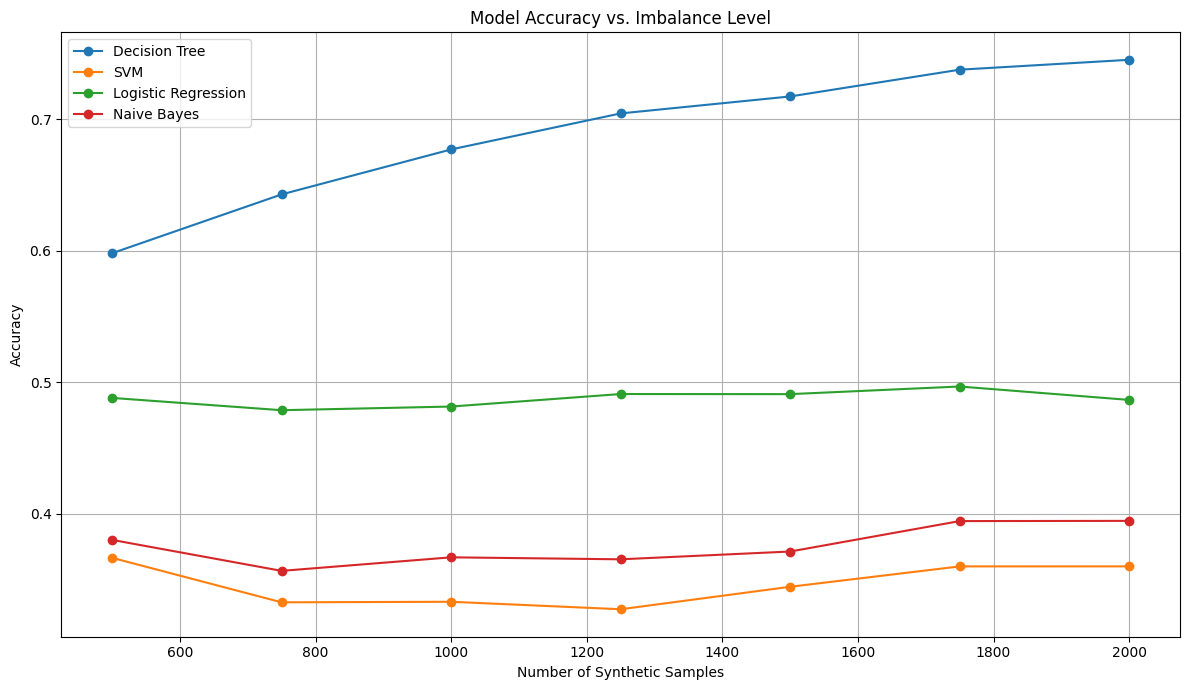

In [58]:
# Plotting
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(imbalance_levels, accuracies, label=name, marker="o")

plt.title("Model Accuracy vs. Imbalance Level")
plt.xlabel("Number of Synthetic Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

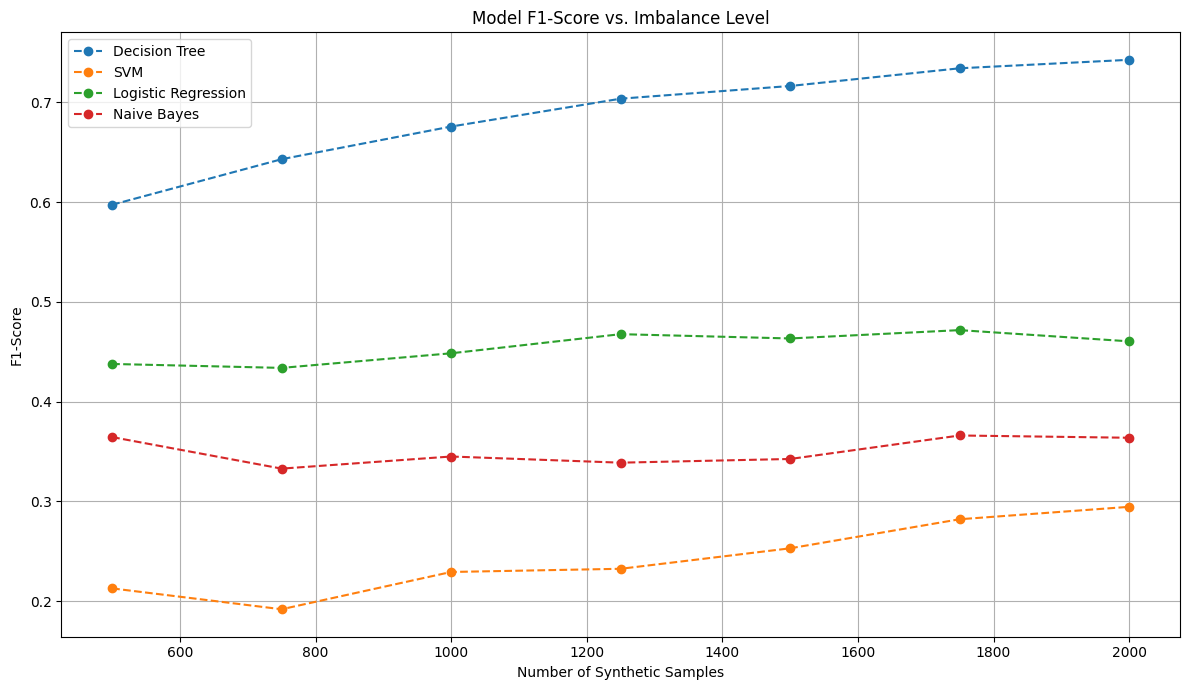

In [59]:
# Plotting F1-scores
plt.figure(figsize=(12, 7))
for name, f1_scores in f1_results.items():
    plt.plot(imbalance_levels, f1_scores, label=name, marker="o", linestyle="--")

plt.title("Model F1-Score vs. Imbalance Level")
plt.xlabel("Number of Synthetic Samples")
plt.ylabel("F1-Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
accuracy_results = {name: [] for name in classifiers}
f1_score_results = {name: [] for name in classifiers}
strategies = ["auto", "minority", "all", "not majority", "not minority"]

for strategy in strategies:
    # Create SMOTEENN instance with dynamic n_neighbors
    smote_enn = SMOTE(
        sampling_strategy=strategy, random_state=10, k_neighbors=4
    )
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.3, random_state=10
    )

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_results[name].append(accuracy)
        f1 = f1_score(y_test, predictions, average="weighted")
        f1_score_results[name].append(f1)
        print(f"F1 Score for {name}: {f1:.4f}")
        print(f"Accuracy for {name}: {accuracy:.4f}")
        print(
            f"Classification Report for {name}:\n",
            classification_report(y_test, predictions),
        )
        print("-" * 50)

F1 Score for Decision Tree: 0.7934
Accuracy for Decision Tree: 0.7955
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           3       0.92      0.96      0.94       832
           4       0.82      0.84      0.83       829
           5       0.67      0.61      0.64       892
           6       0.55      0.53      0.54       822
           7       0.71      0.73      0.72       826
           8       0.87      0.89      0.88       892
           9       1.00      1.00      1.00       863

    accuracy                           0.80      5956
   macro avg       0.79      0.79      0.79      5956
weighted avg       0.79      0.80      0.79      5956

--------------------------------------------------
F1 Score for SVM: 0.2880
Accuracy for SVM: 0.3454
Classification Report for SVM:
               precision    recall  f1-score   support

           3       0.39      0.43      0.41       832
           4       0.34      0.49      0.40      

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score for Logistic Regression: 0.4748
Accuracy for Logistic Regression: 0.4909
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.51      0.53      0.52       832
           4       0.48      0.49      0.48       829
           5       0.41      0.41      0.41       892
           6       0.31      0.25      0.28       822
           7       0.40      0.30      0.34       826
           8       0.47      0.45      0.46       892
           9       0.70      1.00      0.82       863

    accuracy                           0.49      5956
   macro avg       0.47      0.49      0.47      5956
weighted avg       0.47      0.49      0.47      5956

--------------------------------------------------
F1 Score for Naive Bayes: 0.3562
Accuracy for Naive Bayes: 0.3969
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.59      0.43      0.49       832
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1 Score for Logistic Regression: 0.6021
Accuracy for Logistic Regression: 0.6459
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.40      0.03      0.06        58
           5       0.59      0.58      0.58       640
           6       0.53      0.67      0.59       885
           7       0.53      0.09      0.16       330
           8       0.00      0.00      0.00        69
           9       0.81      1.00      0.90       814

    accuracy                           0.65      2799
   macro avg       0.41      0.34      0.33      2799
weighted avg       0.61      0.65      0.60      2799

--------------------------------------------------
F1 Score for Naive Bayes: 0.5437
Accuracy for Naive Bayes: 0.5716
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.04      0.33      0.07         3
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score for Logistic Regression: 0.4748
Accuracy for Logistic Regression: 0.4909
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.51      0.53      0.52       832
           4       0.48      0.49      0.48       829
           5       0.41      0.41      0.41       892
           6       0.31      0.25      0.28       822
           7       0.40      0.30      0.34       826
           8       0.47      0.45      0.46       892
           9       0.70      1.00      0.82       863

    accuracy                           0.49      5956
   macro avg       0.47      0.49      0.47      5956
weighted avg       0.47      0.49      0.47      5956

--------------------------------------------------
F1 Score for Naive Bayes: 0.3562
Accuracy for Naive Bayes: 0.3969
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.59      0.43      0.49       832
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score for Logistic Regression: 0.4748
Accuracy for Logistic Regression: 0.4909
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.51      0.53      0.52       832
           4       0.48      0.49      0.48       829
           5       0.41      0.41      0.41       892
           6       0.31      0.25      0.28       822
           7       0.40      0.30      0.34       826
           8       0.47      0.45      0.46       892
           9       0.70      1.00      0.82       863

    accuracy                           0.49      5956
   macro avg       0.47      0.49      0.47      5956
weighted avg       0.47      0.49      0.47      5956

--------------------------------------------------
F1 Score for Naive Bayes: 0.3562
Accuracy for Naive Bayes: 0.3969
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.59      0.43      0.49       832
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

F1 Score for Logistic Regression: 0.4221
Accuracy for Logistic Regression: 0.4292
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           3       0.50      0.55      0.53       861
           4       0.49      0.46      0.48       863
           5       0.42      0.44      0.43       858
           6       0.32      0.23      0.27       849
           7       0.37      0.32      0.34       844
           8       0.43      0.58      0.49       831
           9       0.00      0.00      0.00         1

    accuracy                           0.43      5107
   macro avg       0.36      0.37      0.36      5107
weighted avg       0.42      0.43      0.42      5107

--------------------------------------------------
F1 Score for Naive Bayes: 0.3191
Accuracy for Naive Bayes: 0.3372
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           3       0.60      0.43      0.50       861
       

/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stavre/miniconda3/envs/pyenv_rcs/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

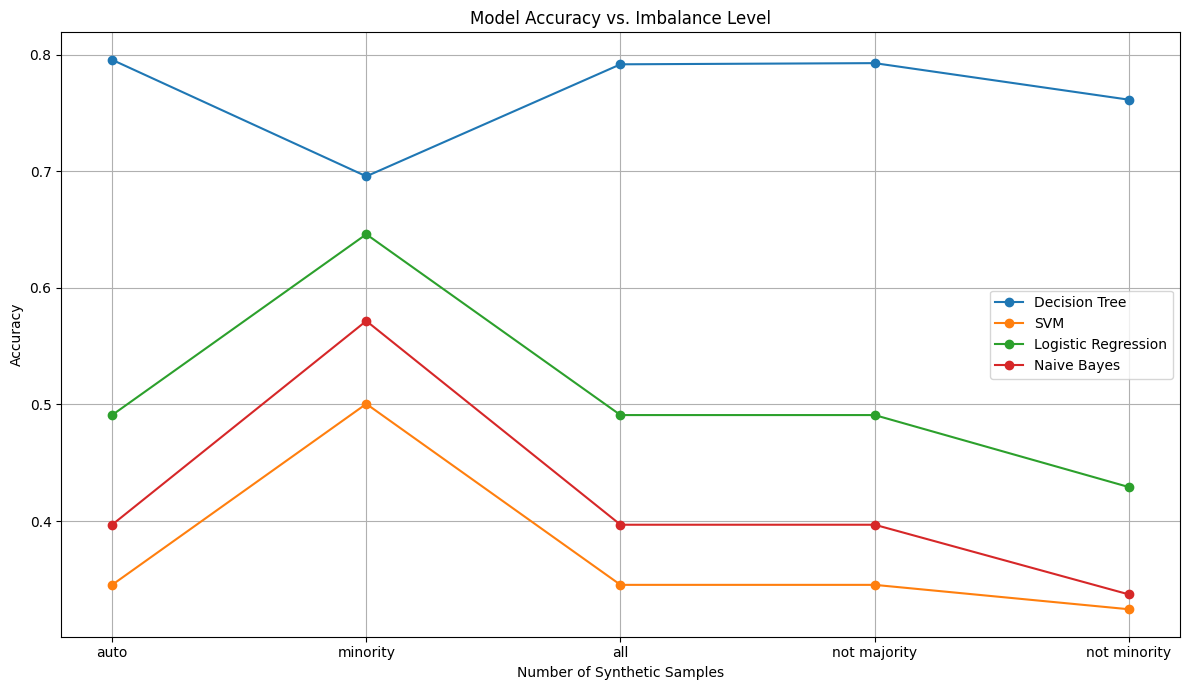

In [61]:
# Plotting
plt.figure(figsize=(12, 7))
for name, accuracies in accuracy_results.items():
    plt.plot(strategies, accuracies, label=name, marker="o")

plt.title("Model Accuracy vs. Imbalance Level")
plt.xlabel("Number of Synthetic Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

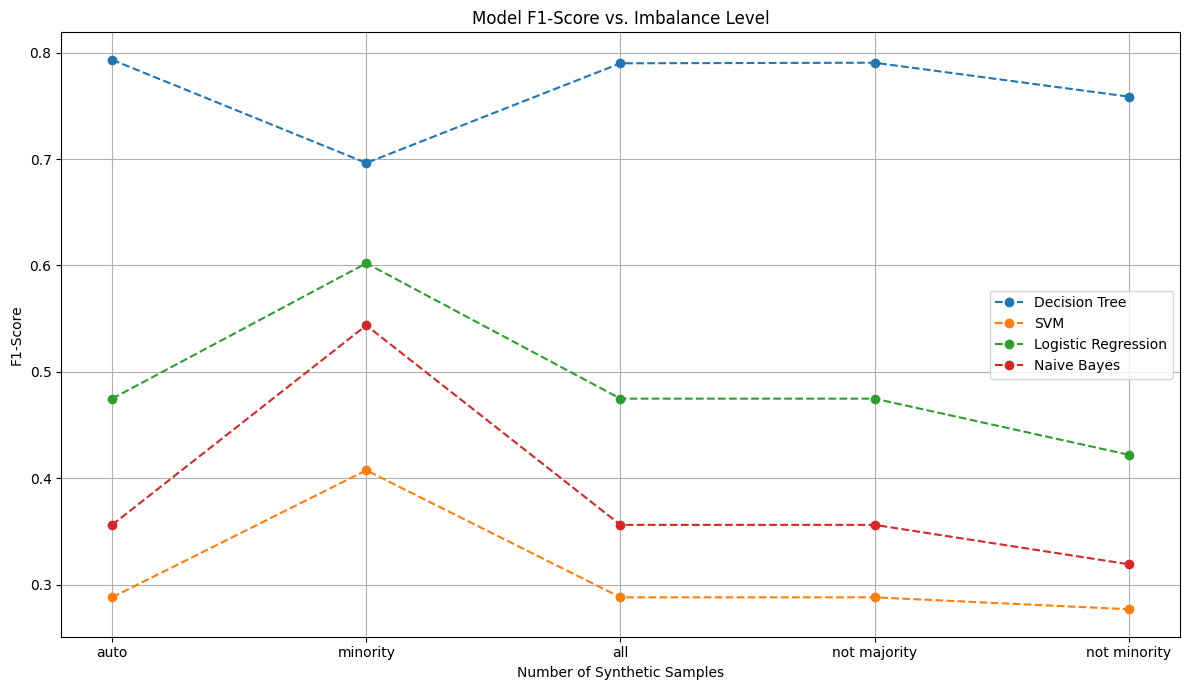

In [62]:
# Plotting F1-scores
plt.figure(figsize=(12, 7))
for name, f1_scores in f1_score_results.items():
    plt.plot(strategies, f1_scores, label=name, marker="o", linestyle="--")

plt.title("Model F1-Score vs. Imbalance Level")
plt.xlabel("Number of Synthetic Samples")
plt.ylabel("F1-Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()